In [1]:
from zipfile import ZipFile
import os

In [2]:
with ZipFile('dataset/walmart.csv.zip','r')as zip:
    zip.extractall()

In [3]:
import pandas as pd

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
data=pd.read_csv('dataset/walmart.csv')

In [5]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [6]:
data_preprocessed=data.copy()

In [7]:
data_preprocessed.shape

(550068, 10)

In [8]:
data_preprocessed.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [9]:
data_preprocessed=data.groupby(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status']).sum(numeric_only=True).reset_index()

In [10]:
data_preprocessed.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,F,0-17,10,A,2,0,213,334093
1,1000002,M,55+,16,C,4+,0,354,810472
2,1000003,M,26-35,15,A,3,0,93,341635
3,1000004,M,46-50,7,B,2,1,33,206468
4,1000005,M,26-35,20,A,1,1,659,821001


In [11]:
data_preprocessed.shape

(5891, 9)

In [12]:
data_preprocessed=data_preprocessed.sort_values('Purchase',ascending=False,ignore_index=True)

In [13]:
data_preprocessed.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1004277,M,36-45,16,A,0,0,6127,10536909
1,1001680,M,26-35,20,A,3,1,6312,8699596
2,1002909,M,26-35,7,A,1,0,4324,7577756
3,1001941,M,36-45,17,A,1,0,5302,6817493
4,1000424,M,26-35,17,A,3,0,4143,6573609


In [14]:
for col in data_preprocessed.columns:
  print(col,":\n",data_preprocessed[col].unique())
  print("-"*70)

User_ID :
 [1004277 1001680 1002909 ... 1003883 1000094 1004464]
----------------------------------------------------------------------
Gender :
 ['M' 'F']
----------------------------------------------------------------------
Age :
 ['36-45' '26-35' '18-25' '46-50' '55+' '0-17' '51-55']
----------------------------------------------------------------------
Occupation :
 [16 20  7 17 14  1  3  4  6  0 18 10  8 12 19  5  2 11  9 15 13]
----------------------------------------------------------------------
City_Category :
 ['A' 'B' 'C']
----------------------------------------------------------------------
Stay_In_Current_City_Years :
 ['0' '3' '1' '2' '4+']
----------------------------------------------------------------------
Marital_Status :
 [0 1]
----------------------------------------------------------------------
Product_Category :
 [6127 6312 4324 ...   35   46   22]
----------------------------------------------------------------------
Purchase :
 [10536909  8699596  7577756 ..

In [15]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     5891 non-null   int64 
 1   Gender                      5891 non-null   object
 2   Age                         5891 non-null   object
 3   Occupation                  5891 non-null   int64 
 4   City_Category               5891 non-null   object
 5   Stay_In_Current_City_Years  5891 non-null   object
 6   Marital_Status              5891 non-null   int64 
 7   Product_Category            5891 non-null   int64 
 8   Purchase                    5891 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 414.3+ KB


In [16]:
data_preprocessed['Gender']=data_preprocessed['Gender'].replace({'M':1,'F':0})

C:\Users\HP\AppData\Local\Temp\ipykernel_22172\3209100219.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_preprocessed['Gender']=data_preprocessed['Gender'].replace({'M':1,'F':0})


In [17]:
data_preprocessed.head(30)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1004277,1,36-45,16,A,0,0,6127,10536909
1,1001680,1,26-35,20,A,3,1,6312,8699596
2,1002909,1,26-35,7,A,1,0,4324,7577756
3,1001941,1,36-45,17,A,1,0,5302,6817493
4,1000424,1,26-35,17,A,3,0,4143,6573609
5,1004448,1,26-35,14,A,0,0,3019,6566245
6,1005831,1,26-35,1,A,2,1,4119,6512433
7,1001015,1,36-45,3,A,4+,1,4941,6511314
8,1003391,1,18-25,4,A,0,0,3911,6477160
9,1001181,1,36-45,7,A,3,1,4938,6387961


In [18]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     5891 non-null   int64 
 1   Gender                      5891 non-null   int64 
 2   Age                         5891 non-null   object
 3   Occupation                  5891 non-null   int64 
 4   City_Category               5891 non-null   object
 5   Stay_In_Current_City_Years  5891 non-null   object
 6   Marital_Status              5891 non-null   int64 
 7   Product_Category            5891 non-null   int64 
 8   Purchase                    5891 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 414.3+ KB


In [19]:
data_preprocessed['Age'].unique()

array(['36-45', '26-35', '18-25', '46-50', '55+', '0-17', '51-55'],
      dtype=object)

In [20]:
import math

In [21]:
def calculate_age(age_range):
    if '+' in age_range:
        return math.ceil(float(age_range.replace("+",""))+5)
    else:
        start,end=map(float,age_range.split("-"))
        return math.ceil((start+end)/2)

In [22]:
data_preprocessed['Age']=data_preprocessed['Age'].apply(calculate_age)

In [23]:
data_preprocessed.head(30)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1004277,1,41,16,A,0,0,6127,10536909
1,1001680,1,31,20,A,3,1,6312,8699596
2,1002909,1,31,7,A,1,0,4324,7577756
3,1001941,1,41,17,A,1,0,5302,6817493
4,1000424,1,31,17,A,3,0,4143,6573609
5,1004448,1,31,14,A,0,0,3019,6566245
6,1005831,1,31,1,A,2,1,4119,6512433
7,1001015,1,41,3,A,4+,1,4941,6511314
8,1003391,1,22,4,A,0,0,3911,6477160
9,1001181,1,41,7,A,3,1,4938,6387961


In [24]:
data_preprocessed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     5891 non-null   int64 
 1   Gender                      5891 non-null   int64 
 2   Age                         5891 non-null   int64 
 3   Occupation                  5891 non-null   int64 
 4   City_Category               5891 non-null   object
 5   Stay_In_Current_City_Years  5891 non-null   object
 6   Marital_Status              5891 non-null   int64 
 7   Product_Category            5891 non-null   int64 
 8   Purchase                    5891 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 414.3+ KB


In [25]:
data_preprocessed['Stay_In_Current_City_Years'].unique()

array(['0', '3', '1', '2', '4+'], dtype=object)

In [26]:
data_preprocessed['Stay_In_Current_City_Years']=data_preprocessed['Stay_In_Current_City_Years'].apply(
    lambda x:int(x.replace("+",""))+1 if "+" in x else int(x)
)

In [27]:
data_preprocessed['Stay_In_Current_City_Years'].unique()

array([0, 3, 1, 2, 5], dtype=int64)

In [28]:
data_preprocessed.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1004277,1,41,16,A,0,0,6127,10536909
1,1001680,1,31,20,A,3,1,6312,8699596
2,1002909,1,31,7,A,1,0,4324,7577756
3,1001941,1,41,17,A,1,0,5302,6817493
4,1000424,1,31,17,A,3,0,4143,6573609


In [29]:
data_df=pd.get_dummies(data_preprocessed,columns=['City_Category'],drop_first=True).astype(int)

In [30]:
data_df.head(40)

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,City_Category_B,City_Category_C
0,1004277,1,41,16,0,0,6127,10536909,0,0
1,1001680,1,31,20,3,1,6312,8699596,0,0
2,1002909,1,31,7,1,0,4324,7577756,0,0
3,1001941,1,41,17,1,0,5302,6817493,0,0
4,1000424,1,31,17,3,0,4143,6573609,0,0
5,1004448,1,31,14,0,0,3019,6566245,0,0
6,1005831,1,31,1,2,1,4119,6512433,0,0
7,1001015,1,41,3,5,1,4941,6511314,0,0
8,1003391,1,22,4,0,0,3911,6477160,0,0
9,1001181,1,41,7,3,1,4938,6387961,0,0


In [31]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   User_ID                     5891 non-null   int32
 1   Gender                      5891 non-null   int32
 2   Age                         5891 non-null   int32
 3   Occupation                  5891 non-null   int32
 4   Stay_In_Current_City_Years  5891 non-null   int32
 5   Marital_Status              5891 non-null   int32
 6   Product_Category            5891 non-null   int32
 7   Purchase                    5891 non-null   int32
 8   City_Category_B             5891 non-null   int32
 9   City_Category_C             5891 non-null   int32
dtypes: int32(10)
memory usage: 230.2 KB


In [32]:
for col in data_df.columns:
    print(col,": \n",data_df[col].unique())
    print("-"*70)  

User_ID : 
 [1004277 1001680 1002909 ... 1003883 1000094 1004464]
----------------------------------------------------------------------
Gender : 
 [1 0]
----------------------------------------------------------------------
Age : 
 [41 31 22 48 60  9 53]
----------------------------------------------------------------------
Occupation : 
 [16 20  7 17 14  1  3  4  6  0 18 10  8 12 19  5  2 11  9 15 13]
----------------------------------------------------------------------
Stay_In_Current_City_Years : 
 [0 3 1 2 5]
----------------------------------------------------------------------
Marital_Status : 
 [0 1]
----------------------------------------------------------------------
Product_Category : 
 [6127 6312 4324 ...   35   46   22]
----------------------------------------------------------------------
Purchase : 
 [10536909  8699596  7577756 ...    49349    49288    46681]
----------------------------------------------------------------------
City_Category_B : 
 [0 1]
--------------

In [33]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [34]:
Scaler=StandardScaler()

In [35]:
df=data_df.copy()

In [36]:
df.head()

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,City_Category_B,City_Category_C
0,1004277,1,41,16,0,0,6127,10536909,0,0
1,1001680,1,31,20,3,1,6312,8699596,0,0
2,1002909,1,31,7,1,0,4324,7577756,0,0
3,1001941,1,41,17,1,0,5302,6817493,0,0
4,1000424,1,31,17,3,0,4143,6573609,0,0


In [37]:
df=df.drop(columns=['User_ID'],axis=1)

In [38]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,City_Category_B,City_Category_C
0,1,41,16,0,0,6127,10536909,0,0
1,1,31,20,3,1,6312,8699596,0,0
2,1,31,7,1,0,4324,7577756,0,0
3,1,41,17,1,0,5302,6817493,0,0
4,1,31,17,3,0,4143,6573609,0,0


In [39]:
type(df)

pandas.core.frame.DataFrame

In [40]:
standardized_data=Scaler.fit_transform(df)

In [41]:
processed_df=pd.DataFrame(standardized_data,columns=df.columns)

In [42]:
processed_df.head(30)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,City_Category_B,City_Category_C
0,0.627949,0.434623,1.241058,-1.290471,-0.850898,9.331980,10.250378,-0.638735,-1.068
1,0.627949,-0.384432,1.873708,0.632829,1.175229,9.639042,8.303174,-0.638735,-1.068
2,0.627949,-0.384432,-0.182407,-0.649371,-0.850898,6.339376,7.114235,-0.638735,-1.068
3,0.627949,0.434623,1.399220,-0.649371,-0.850898,7.962652,6.308500,-0.638735,-1.068
4,0.627949,-0.384432,1.399220,0.632829,-0.850898,6.038953,6.050029,-0.638735,-1.068
5,0.627949,-0.384432,0.924732,-1.290471,-0.850898,4.173347,6.042225,-0.638735,-1.068
6,0.627949,-0.384432,-1.131383,-0.008271,1.175229,5.999118,5.985194,-0.638735,-1.068
7,0.627949,0.434623,-0.815057,1.915029,1.175229,7.363467,5.984008,-0.638735,-1.068
8,0.627949,-1.121581,-0.656895,-1.290471,-0.850898,5.653882,5.947811,-0.638735,-1.068
9,0.627949,0.434623,-0.182407,0.632829,1.175229,7.358488,5.853277,-0.638735,-1.068


In [43]:
minmax_scaler=MinMaxScaler()

In [44]:
mmscaled=minmax_scaler.fit_transform(df)

In [45]:
mmscaled_data=pd.DataFrame(mmscaled,columns=df.columns)

In [46]:
mmscaled_data.head(30)

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,City_Category_B,City_Category_C
0,1.0,0.627451,0.80,0.0,0.0,0.970621,1.000000,0.0,0.0
1,1.0,0.431373,1.00,0.6,1.0,1.000000,0.824855,0.0,0.0
2,1.0,0.431373,0.35,0.2,0.0,0.684294,0.717913,0.0,0.0
3,1.0,0.627451,0.85,0.2,0.0,0.839606,0.645440,0.0,0.0
4,1.0,0.431373,0.85,0.6,0.0,0.655550,0.622191,0.0,0.0
5,1.0,0.431373,0.70,0.0,0.0,0.477053,0.621489,0.0,0.0
6,1.0,0.431373,0.05,0.4,1.0,0.651739,0.616360,0.0,0.0
7,1.0,0.627451,0.15,1.0,1.0,0.782277,0.616253,0.0,0.0
8,1.0,0.254902,0.20,0.0,0.0,0.618707,0.612997,0.0,0.0
9,1.0,0.627451,0.35,0.6,1.0,0.781801,0.604494,0.0,0.0


In [47]:
from sklearn.cluster import KMeans

In [48]:
num_clusters=[i for i in range(2,21)]

In [49]:
wcss=[]

for i in num_clusters:
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(mmscaled_data)
    wcss.append(kmeans.inertia_)    

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

In [51]:
sns.set()

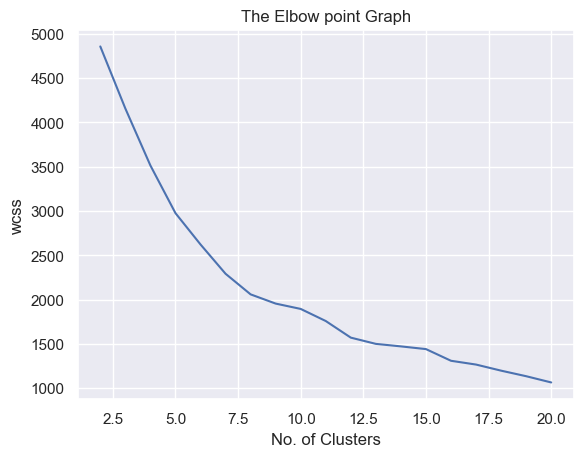

In [52]:
plt.plot(num_clusters,wcss)
plt.title('The Elbow point Graph')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [53]:
wcss

[4858.409576481301,
 4157.6071901194355,
 3514.147385124808,
 2976.045141418364,
 2622.175339405297,
 2291.218650568482,
 2058.4614392205485,
 1954.3352841384947,
 1893.9492984933809,
 1757.3988750036453,
 1569.749346349958,
 1499.2926701720176,
 1470.8865411095194,
 1440.3325329356342,
 1308.3441725426746,
 1265.5709004942094,
 1196.7716652398708,
 1134.0862440993933,
 1063.6025198166851]

In [54]:
from sklearn.metrics import silhouette_score

In [55]:
def kmeans_score(num_clusters,vals):
    score=[]
    for i in num_clusters:
        kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
        kmeans.fit(vals)
        score.append(silhouette_score(vals,kmeans.labels_))
    return score

In [56]:
sil_score=kmeans_score(num_clusters,mmscaled_data)

In [57]:
max(sil_score)

0.3818450340804091

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

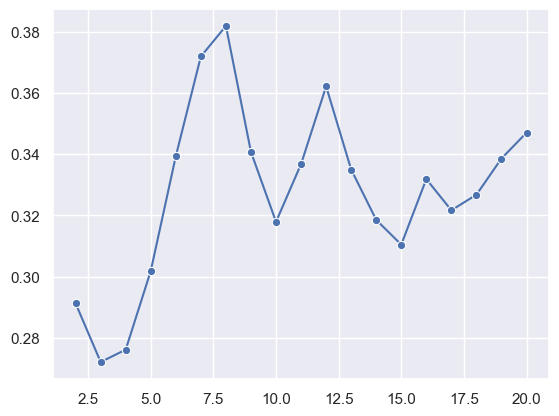

In [58]:
plot=sns.lineplot(x=num_clusters,y=sil_score,marker='o')
plot.set_xlabel('No.of Clusters')
plot.set_ylable('silhouette socre')

In [59]:
print(type(sil_score))
print(sil_score)

<class 'list'>
[0.2912480214496811, 0.2721128028520956, 0.2761413688112254, 0.3018602283869384, 0.3393342848999819, 0.37190452484142544, 0.3818450340804091, 0.34070291194445707, 0.3178945886387296, 0.33677202480018487, 0.36212038568298077, 0.33497321375111566, 0.3185286335771091, 0.31044687021830575, 0.33185783182843565, 0.32166004404167964, 0.32674326618590155, 0.3385687530742388, 0.3470081153590364]


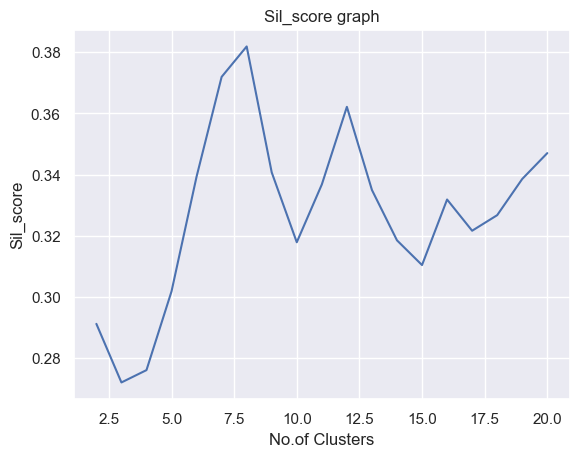

In [60]:
plt.plot(num_clusters,sil_score)
plt.title('Sil_score graph')
plt.xlabel('No.of Clusters')
plt.ylabel('Sil_score')
plt.show()

In [61]:
kmeans8=KMeans(n_clusters=8,init='k-means++',n_init='auto',random_state=42)
kmeans8.fit(mmscaled_data)

KMeans(random_state=42)

In [62]:
data_preprocessed['Cluster']=kmeans8.fit_predict(mmscaled_data)

In [63]:
data_preprocessed.head(30)

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,Cluster
0,1004277,1,41,16,A,0,0,6127,10536909,2
1,1001680,1,31,20,A,3,1,6312,8699596,0
2,1002909,1,31,7,A,1,0,4324,7577756,2
3,1001941,1,41,17,A,1,0,5302,6817493,2
4,1000424,1,31,17,A,3,0,4143,6573609,2
5,1004448,1,31,14,A,0,0,3019,6566245,2
6,1005831,1,31,1,A,2,1,4119,6512433,0
7,1001015,1,41,3,A,5,1,4941,6511314,0
8,1003391,1,22,4,A,0,0,3911,6477160,2
9,1001181,1,41,7,A,3,1,4938,6387961,0


In [68]:
from sklearn.metrics import silhouette_samples

In [69]:
import matplotlib.cm as cm
import numpy as np

Average Silhouette Score: 0.382


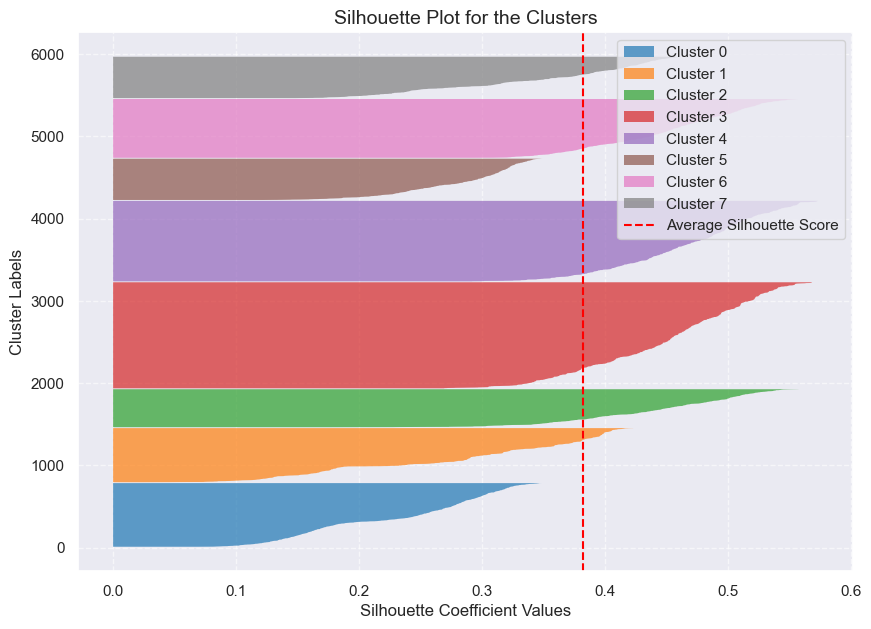

In [70]:
# Calculate silhouette scores for each point
silhouette_vals = silhouette_samples(mmscaled_data, data_preprocessed['Cluster'])

# Overall silhouette score
silhouette_avg = silhouette_score(mmscaled_data, data_preprocessed['Cluster'])
print(f"Average Silhouette Score: {silhouette_avg:.3f}")

# Plot silhouette for each cluster
plt.figure(figsize=(10, 7))
y_lower = 10
n_clusters = len(data_preprocessed['Cluster'].unique())
colors = cm.tab10(np.arange(n_clusters))

for i in range(n_clusters):
    cluster_silhouette_vals = silhouette_vals[data_preprocessed['Cluster'] == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    plt.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        cluster_silhouette_vals,
        facecolor=colors[i % len(colors)],
        edgecolor='none',
        alpha=0.7,
        label=f'Cluster {i}'
    )
    y_lower = y_upper + 10

plt.axvline(x=silhouette_avg, color="red", linestyle="--", label='Average Silhouette Score')
plt.title("Silhouette Plot for the Clusters", fontsize=14)
plt.xlabel("Silhouette Coefficient Values", fontsize=12)
plt.ylabel("Cluster Labels", fontsize=12)
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [71]:
cluster_centers=minmax_scaler.inverse_transform(kmeans8.cluster_centers_)
cluster_centers_df=pd.DataFrame(cluster_centers,columns=data_preprocessed.columns[:-1])
cluster_centers_df

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1.000000e+00,38.574194,8.792258,1.961290,1.000000e+00,795.150968,1.346037e+06,6.296774e-01,5.551115e-16
1,-9.992007e-16,32.503794,6.406677,1.980273,-1.110223e-15,383.332322,5.938487e+05,2.220446e-16,7.132018e-01
2,1.000000e+00,31.557235,8.237581,2.107991,-5.551115e-16,801.010799,1.363027e+06,5.551115e-17,0.000000e+00
3,1.000000e+00,32.744384,8.754454,2.027885,-2.164935e-15,295.800930,5.700186e+05,8.326673e-16,1.000000e+00
4,1.000000e+00,41.734694,9.087755,2.050000,1.000000e+00,298.759184,5.526814e+05,1.054712e-15,1.000000e+00
5,-5.551115e-16,34.878728,6.638171,1.970179,4.274354e-01,654.194831,9.813459e+05,1.000000e+00,-3.330669e-16
6,1.000000e+00,31.879888,8.641061,2.020950,-1.332268e-15,746.405028,1.337706e+06,1.000000e+00,5.551115e-16
7,-5.551115e-16,41.273810,6.839286,1.968254,1.000000e+00,386.589286,5.977566e+05,-1.665335e-16,7.896825e-01


In [123]:
cluster_analysis=data_preprocessed.groupby('Cluster').mean(numeric_only=True)
cluster_analysis

,User_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
Cluster,,,,,,,,
0,1.002954e+06,1.0,38.574194,8.792258,1.961290,1.000000,795.150968,1.346037e+06
1,1.003039e+06,0.0,32.503794,6.406677,1.980273,0.000000,383.332322,5.938487e+05
2,1.002901e+06,1.0,31.557235,8.237581,2.107991,0.000000,801.010799,1.363027e+06
3,1.002999e+06,1.0,32.744384,8.754454,2.027885,0.000000,295.800930,5.700186e+05
4,1.002980e+06,1.0,41.734694,9.087755,2.050000,1.000000,298.759184,5.526814e+05
5,1.003234e+06,0.0,34.878728,6.638171,1.970179,0.427435,654.194831,9.813459e+05
6,1.003053e+06,1.0,31.879888,8.641061,2.020950,0.000000,746.405028,1.337706e+06
7,1.003134e+06,0.0,41.273810,6.839286,1.968254,1.000000,386.589286,5.977566e+05
